<a href="https://colab.research.google.com/github/Danata117/ML/blob/main/ML_Praktika2%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas seaborn scikit-learn
!pip install pandas matplotlib seaborn

# Домашнее задание про практике 2

- Провести разведочный анализ EDA (описать полученный результат). Тут важно, влияет ли X[i] на Y (примеры в практике 2)
- Описать полученный результат относительно анализа целевой перменной и зависимой (см. практика 2)
- Подобороться с пропусками в данных (при наличии в датасете). Объяснить способ выборка борьбы с пропуском
- Обучить модель линейной регресии на всей выборке X, y. Вывести метрики
- Сделать train_test_split и обучить на обучающей выборке. Предсказать результат на обучающей и тестовой выборках. Вывести метрики, объяснить полученный результат

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
PATH_TO_FILE: str = '/content/drive/MyDrive/student_depression_dataset.csv'
df = pd.read_csv(PATH_TO_FILE)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [5]:
# преобразовать категориальные признаки в category
df['Gender'] = df['Gender'].astype('category')
df['City'] = df['City'].astype('category')
df['Profession'] = df['Profession'].astype('category')
df['Sleep Duration'] = df['Sleep Duration'].astype('category')
df['Dietary Habits'] = df['Dietary Habits'].astype('category')
df['Degree'] = df['Degree'].astype('category')
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].astype('category')
df['Financial Stress'] = df['Financial Stress'].astype('category')
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].astype('category')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   id                                     27901 non-null  int64   
 1   Gender                                 27901 non-null  category
 2   Age                                    27901 non-null  float64 
 3   City                                   27901 non-null  category
 4   Profession                             27901 non-null  category
 5   Academic Pressure                      27901 non-null  float64 
 6   Work Pressure                          27901 non-null  float64 
 7   CGPA                                   27901 non-null  float64 
 8   Study Satisfaction                     27901 non-null  float64 
 9   Job Satisfaction                       27901 non-null  float64 
 10  Sleep Duration                         27901 non-null  cat

In [7]:
# выбрать целевую переменную и разделить на X, y
# целевая переменная - числовой непрерывный признак

y = df["CGPA"]
X = df.drop(["id", "CGPA"], axis=1)

In [8]:
X.head(n=3)

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0


In [9]:
y.head(n=3)

,CGPA
0,8.97
1,5.90
2,7.03


## EDA (разведочный анализ относительно целевой переменной)

в этом же блоке побороться с проусками, важно сделать именно после разведочного анализа
- Y и категориальные
- Y и числовые
- Описать все полученные результаты в своем блоке

- Отобрать признаки для дальнейшего анализа, записать в ```best_features```

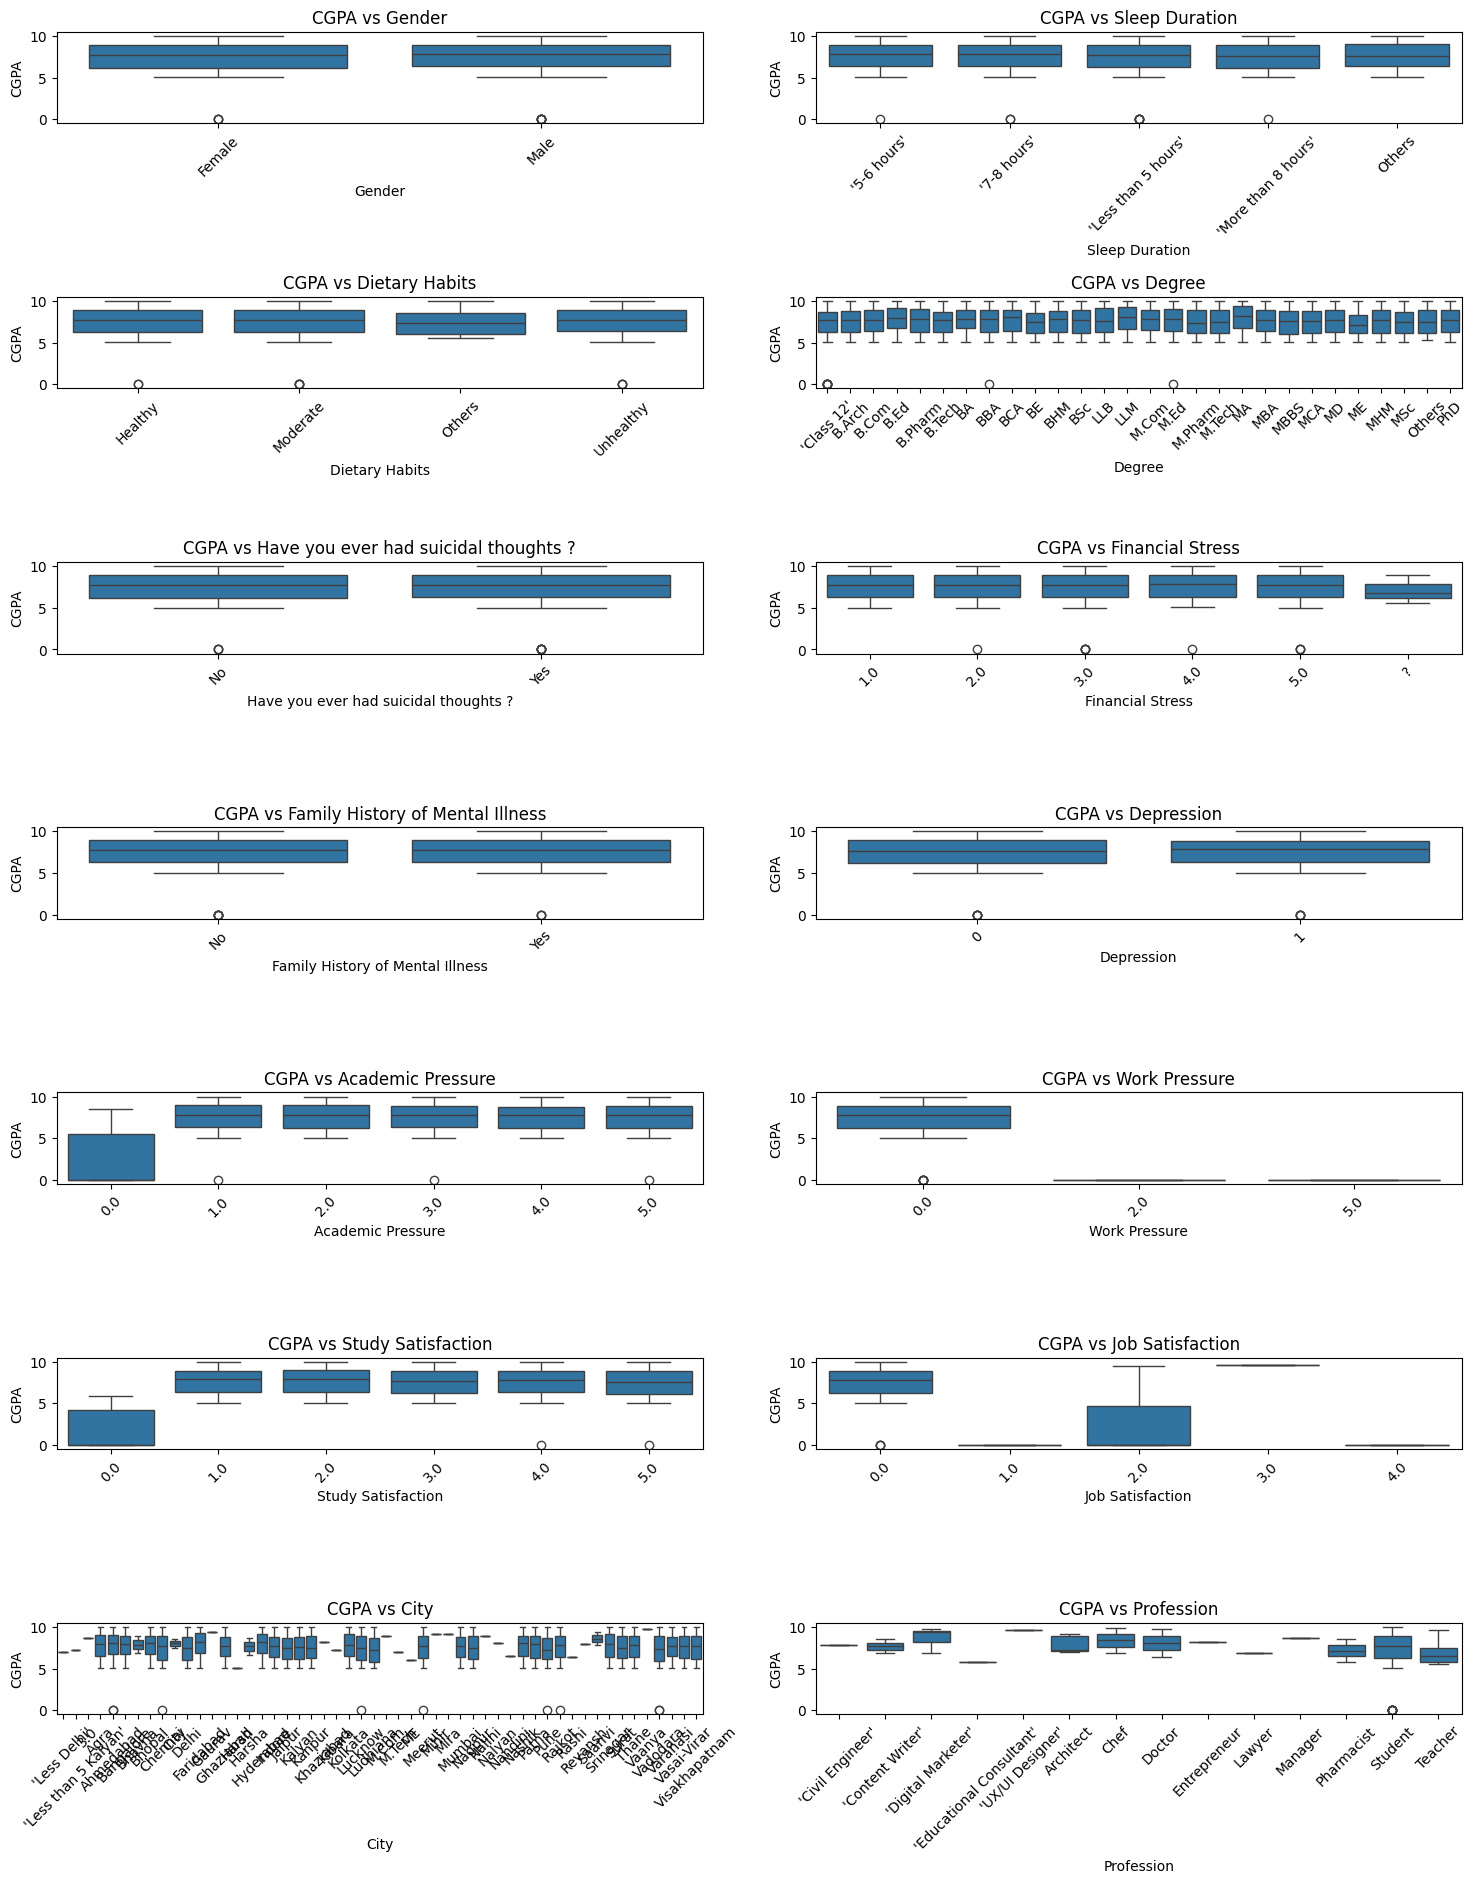

In [10]:
cat_cols = ['Gender', 'Sleep Duration', 'Dietary Habits',
            'Degree', 'Have you ever had suicidal thoughts ?',
            'Financial Stress', 'Family History of Mental Illness', 'Depression', 'Academic Pressure', 'Work Pressure',
            'Study Satisfaction', 'Job Satisfaction','City','Profession']

plt.figure(figsize=(15, 20))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols)//2+1, 2, i)
    sns.boxplot(x=col, y="CGPA", data=df)
    plt.title(f"CGPA vs {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


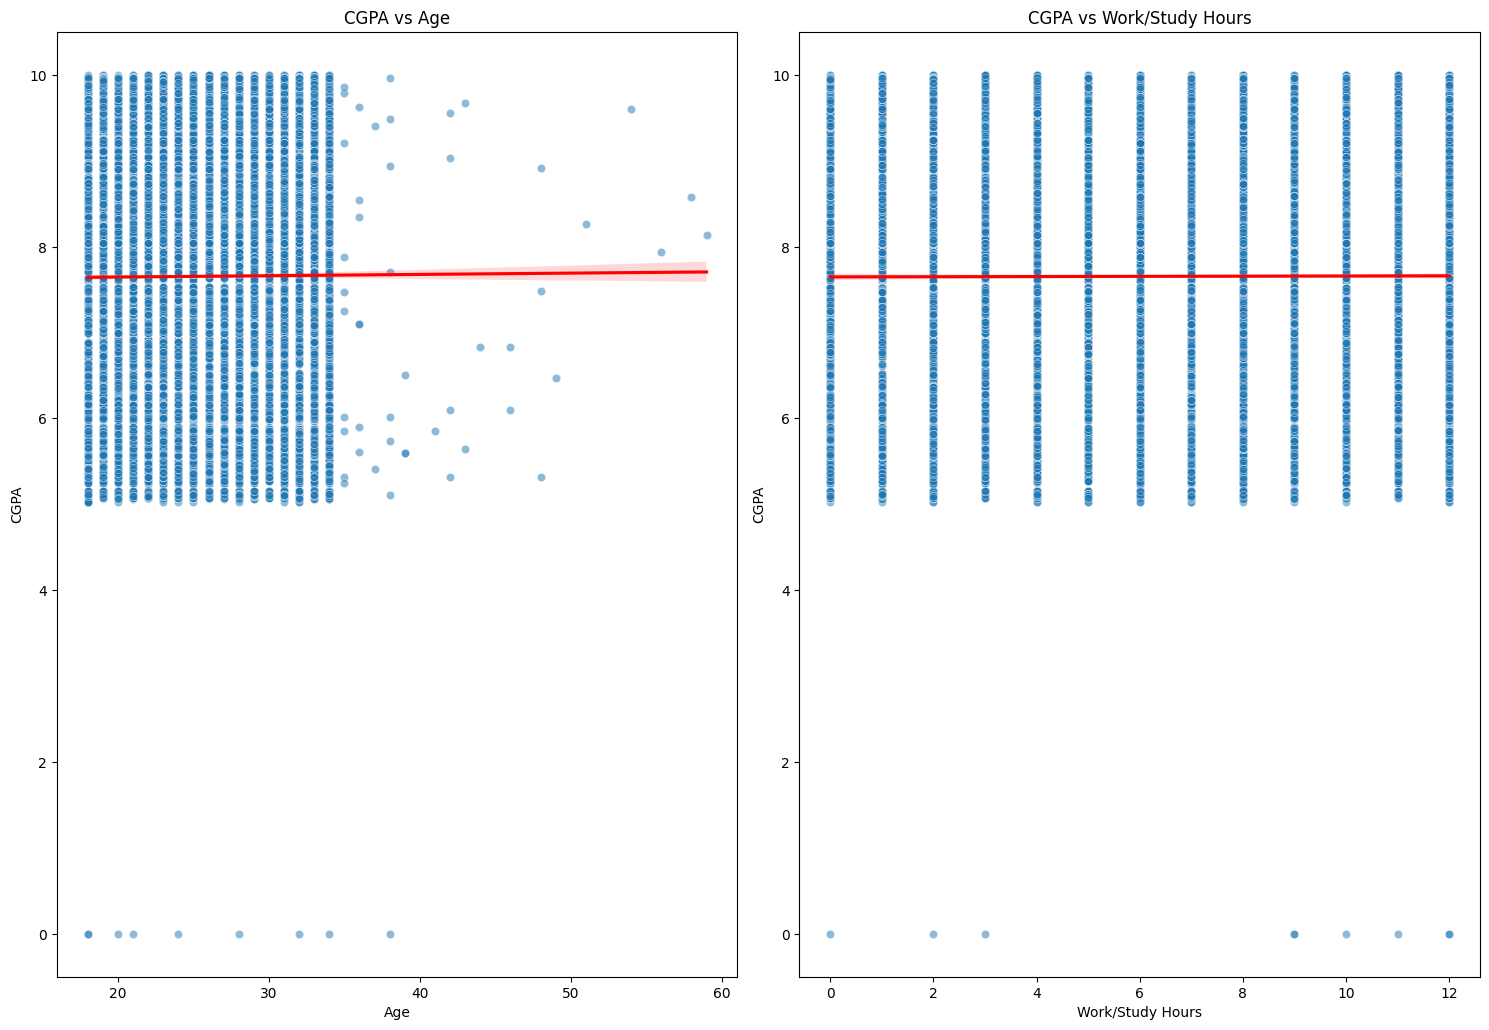

In [11]:
num_cols = ['Age', 'Work/Study Hours']

plt.figure(figsize=(15, 20))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//2+1, 2, i)
    sns.scatterplot(x=col, y="CGPA", data=df, alpha=0.5)
    sns.regplot(x=col, y="CGPA", data=df, scatter=False, color="red")
    plt.title(f"CGPA vs {col}")

plt.tight_layout()
plt.show()


Признаки, которые почти не влияют на CGPA (можно исключить):

Age — возраст почти не влияет на успеваемость.

Work/Study Hours — нет зависимости с CGPA.

City — различий по городам почти нет.

Profession — выбор профессии также не влияет.

Полезные категориальные признаки:

Gender — небольшие различия есть.

Sleep Duration — заметна связь: слишком мало сна или слишком много → хуже успеваемость.

Dietary Habits — питание влияет на CGPA (здоровое = выше баллы).

Degree — разные направления обучения дают разные уровни CGPA.

Have you ever had suicidal thoughts? — связь с более низким CGPA.

Financial Stress — чем выше стресс, тем ниже CGPA.

Family History of Mental Illness — заметна связь.

Depression — депрессия сильно влияет.

Полезные числовые признаки:

Academic Pressure — сильное влияние.

Work Pressure — влияет (при высоком давлении CGPA ниже).

Study Satisfaction — чем выше удовлетворённость, тем выше CGPA.

Job Satisfaction — тоже заметное влияние.

/tmp/ipython-input-1274146544.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("coolwarm")


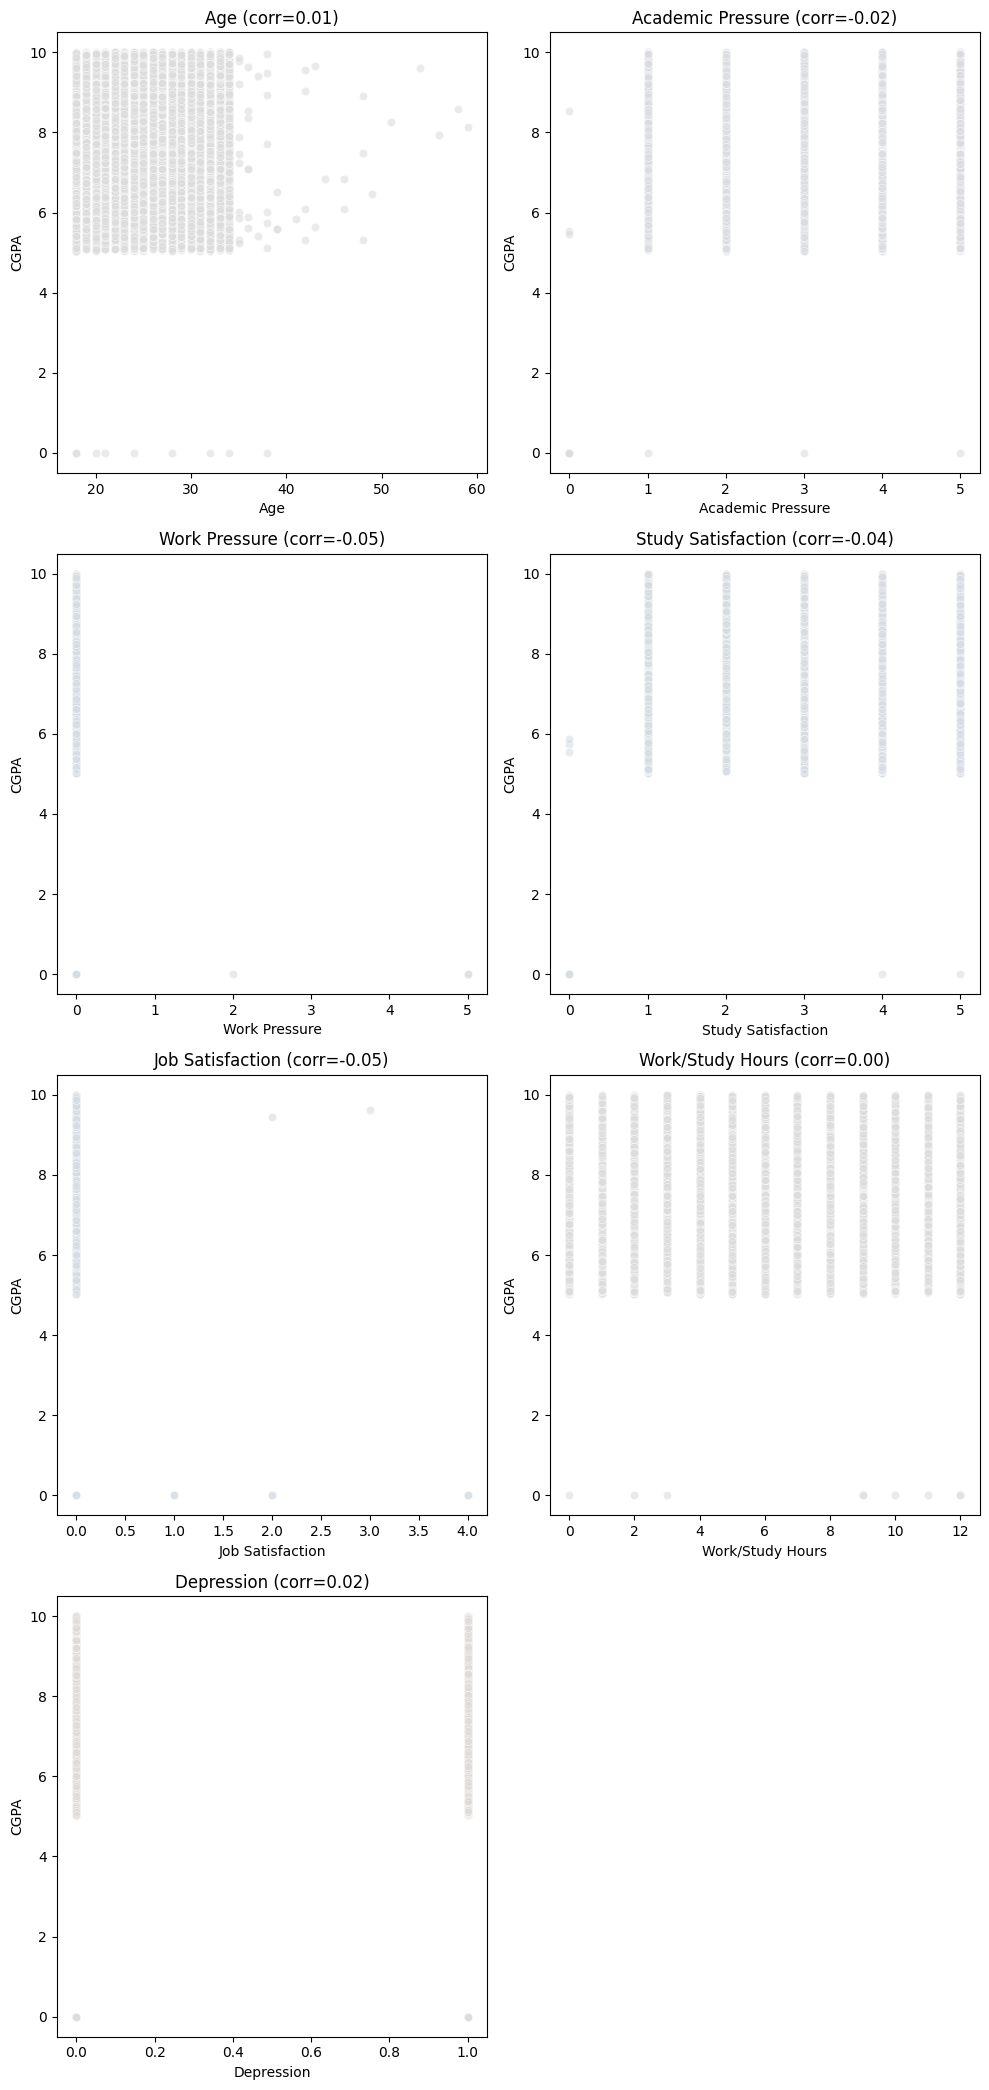

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

num_features = X.select_dtypes(include="number").columns
n = len(num_features)

# корреляции с alcohol
corrs = df[num_features].corrwith(df["CGPA"])

# палитра (от синего до красного)
cmap = plt.cm.get_cmap("coolwarm")

# сетка графиков (2 в строку)
fig, axes = plt.subplots(nrows=(n+1)//2, ncols=2, figsize=(10, n*3))
axes = axes.flatten()

for i, col in enumerate(num_features):
    corr = corrs[col]
    color = cmap((corr + 1) / 2)   # переводим [-1,1] → [0,1]

    sns.scatterplot(ax=axes[i], data=df, x=col, y="CGPA", color=color, alpha=0.6)
    axes[i].set_title(f"{col} (corr={corr:.2f})")

# удаляем пустые ячейки
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [13]:
# заменить "?" в Financial Stress на NaN
df['Financial Stress'] = df['Financial Stress'].replace("?", np.nan)

# заполнение медианой (т.к. шкала числовая)
df['Financial Stress'] = df['Financial Stress'].astype(float)
df['Financial Stress'] = df['Financial Stress'].fillna(df['Financial Stress'].median())


/tmp/ipython-input-4250274381.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Financial Stress'] = df['Financial Stress'].replace("?", np.nan)


In [14]:
categorial_features = ['Gender', 'Sleep Duration','Dietary Habits','Degree', 'Have you ever had suicidal thoughts ?','Financial Stress', 'Family History of Mental Illness', 'Depression','Academic Pressure','Study Satisfaction','Work Pressure','Job Satisfaction']
numeric_features = ['Age','Work/Study Hours']
best_features = categorial_features + numeric_features

## Моделирование

**Общая задача:**
Сравнить несколько вариантов линейной регрессии на датасете (с предобработкой признаков: стандартизация числовых, OneHot/Label для категориальных).

**предобработка**
- Категориальные признаки преобразовать с помощью OneHotEncoder (если признак является типом **bool** по логике можно интерпретировать как (true, false) То можно LabelEncoder)
- Числовые признаки записать в `X_scaled` и провести стандартизацию с помощью `StandardScaler`. Желательно без категориальных признаков


---
**Метрики**: (MAE, MAPE, R², MSE, RMSE)

---

**Модель 1.**

- Использовать **все признаки (кроме y)**.
- Обучить на **всей выборке** (без разделения).
- Сделать предсказания на этой же выборке.
- Вывести метрики и интерпретировать.
- Построить график коэффициентов (model.coef\_ vs X\_scaled.columns) и интерпретировать.

---

**Модель 2.**

- Использовать **все признаки**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 3.**

- Использовать только **best\_features** (отобранные признаки).
- Обучить на **всей выборке**.
- Предсказать на всей выборке.
- Вывести метрики качества и интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 4.**

- Использовать **best\_features**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики качества для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

P.S.
- Важно не забывать о стандартизации и разделении категориальных признаков на отдельные олонки
- Все примеры есть в практике 2


P.S.S
Старайтесь делать собственные предположения, ChatGPT задачу решит, но вы не добьетесь понимания полученных результатов

---
В результате должно получиться 4 модели

- первые две на всех колонках (фичах)
- последующие на отобранных фичах (колонках)

## Ниже представлены подсказки, то что нужно использовать и как должно называться

### Преобразование категориальных

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X["Gender"] = le.fit_transform(df["Gender"]) #Male=1, Female=0
X["Have you ever had suicidal thoughts ?"] = le.fit_transform(df["Have you ever had suicidal thoughts ?"])
X["Family History of Mental Illness"] = le.fit_transform(df["Family History of Mental Illness"])


In [16]:
# заменить "?" в Financial Stress на NaN
X['Financial Stress'] = df['Financial Stress'].replace("?", np.nan)

# заполнение медианой (т.к. шкала числовая)
X['Financial Stress'] = df['Financial Stress'].astype(float)
X['Financial Stress'] = df['Financial Stress'].fillna(df['Financial Stress'].median())


In [30]:
from sklearn.preprocessing import OneHotEncoder
# список категориальных признаков (из EDA)
cat_cols = ['City','Profession','Sleep Duration', 'Dietary Habits','Degree']

# инициализация OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
# drop='first' → чтобы избежать дамми-ловушки (лишней колонки)

# применяем энкодер

encoded = encoder.fit_transform(X[cat_cols])
# превращаем в DataFrame
encoded_df = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(cat_cols),
    index=X.index
)

# удаляем старые категориальные признаки и добавляем новые
X = X.drop(columns=cat_cols)
X = pd.concat([X, encoded_df], axis=1)

print("Размерность X после кодирования:", X.shape)



KeyError: "None of [Index(['City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree'], dtype='object')] are in the [columns]"

In [18]:
from sklearn.preprocessing import StandardScaler
num_features = [X['Age'],X['Work/Study Hours']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(num_features) # попробовать избавиться от категориальных. То ест не засовывать такие признаки в стандартизацию

num_features = [X_best['Age'],X_best['Work/Study Hours']]
scaler = StandardScaler()
X_scaled_best = scaler.fit_transform(num_features) # попробовать избавиться от категориальных. То ест не засовывать такие признаки в стандартизацию


In [19]:
X

,Gender,Age,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
0,1,33.0,5.0,0.0,2.0,0.0,1,3.0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,24.0,2.0,0.0,5.0,0.0,0,3.0,2.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,31.0,3.0,0.0,5.0,0.0,0,9.0,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,28.0,3.0,0.0,2.0,0.0,1,4.0,5.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,25.0,4.0,0.0,3.0,0.0,1,1.0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0,27.0,5.0,0.0,5.0,0.0,1,7.0,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27897,1,27.0,2.0,0.0,3.0,0.0,0,0.0,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27898,1,31.0,3.0,0.0,4.0,0.0,0,12.0,2.0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27899,0,18.0,5.0,0.0,2.0,0.0,1,10.0,5.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Модель № 1

Использовать все признаки (кроме y).

Обучить на всей выборке (без разделения).

Сделать предсказания на этой же выборке.

Вывести метрики и интерпретировать.

Построить график коэффициентов (model.coef_ vs X_scaled.columns) и интерпретировать.

In [20]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X, y)
y_pred = model1.predict(X)
y_pred
# model.fit(X, y) - обучение
# model.predict(X) - предсказание y
# model.coef_ - коэфициенты фич (каждый коэф относится по индексу к своей фиче)



array([7.74612853, 7.65189929, 7.82625463, ..., 7.98000178, 7.23260309,
       7.90724094])

In [21]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error, root_mean_squared_error

MAE = mean_absolute_error(y, y_pred)
print('MAE %.3f' % MAE)

MAPE = mean_absolute_percentage_error(y, y_pred)
print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAPE, MAPE * 100, '%'))

R2 = r2_score(y, y_pred)
print('R2=%.3f' % R2)

MSE = mean_squared_error(y, y_pred)
print('MSE=%.3f' % MSE)

RMSE = root_mean_squared_error(y, y_pred)
print('RMSE=%.3f' % RMSE)

MAE 1.251
MAPE=7542020057948.205, MAPE_as_percent=754202005794820.500%
R2=0.026
MSE=2.108
RMSE=1.452


### Интерпретация модели 1:

MAE 1.251 - на столько модель ошибается, значение далеко от нуля это плохо

MAPE=7542020057948.205, MAPE_as_percent=754202005794820.500% - в у есть ноль или значение близкое к нулю из-за этого числа такие большие. MAPE использовать нельзя.

R2=0.026 - объясняет только 2,6 % разброса данных. Это почти случайное угадывание. Модель почти не лучше среднего.

MSE=2.108 - есть отдельные довольно большие промахи, которые сильно влияют.

RMSE=1.452 - есть несколько выбросов (очень плохих предсказаний), которые RMSE чувствует сильнее, чем MAE.

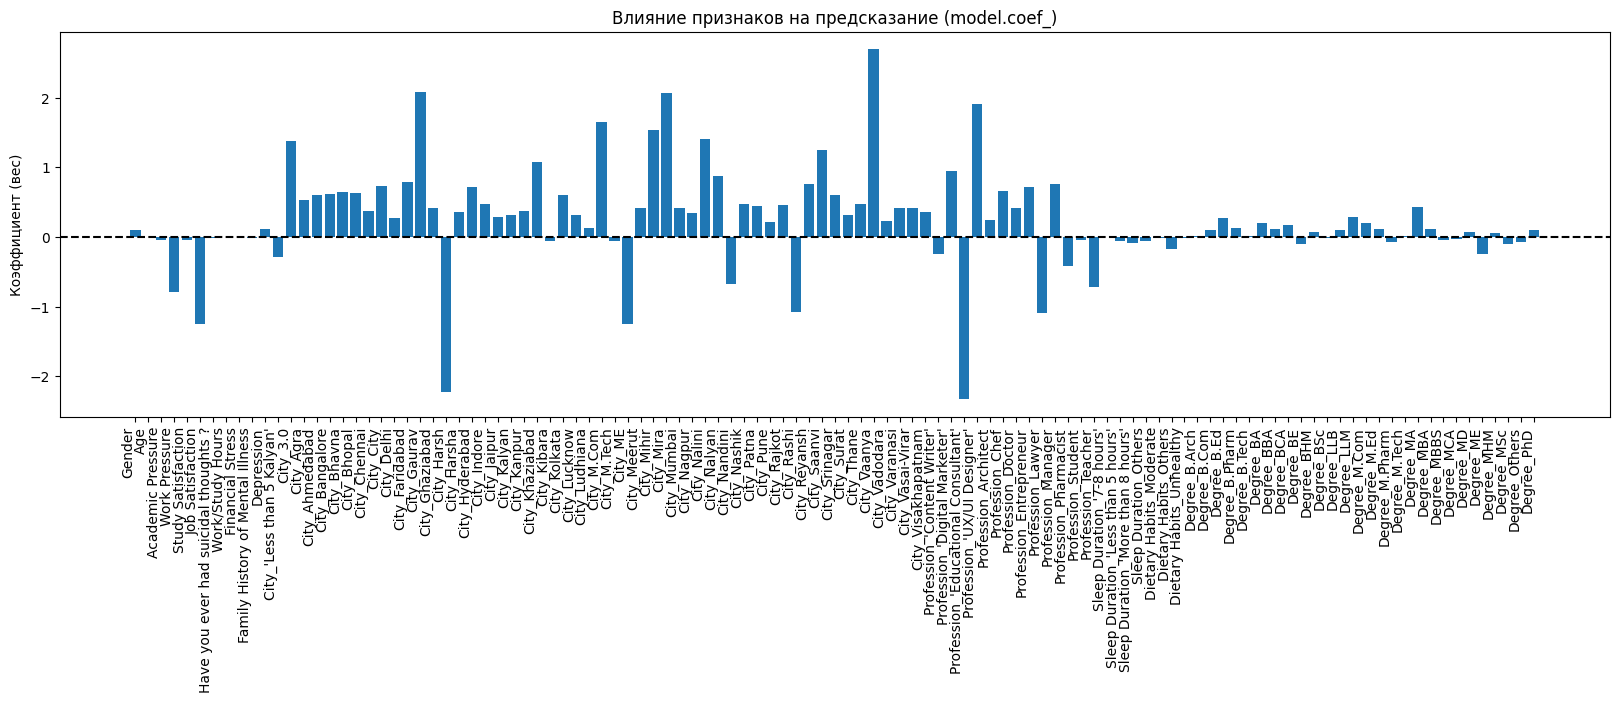

In [22]:
coefs = model1.coef_
coef_df = pd.DataFrame({"feature": X.columns, "coef": coefs})
plt.figure(figsize=(20,5))
plt.bar(coef_df["feature"], coef_df["coef"])
plt.axhline(y=0, color='black', linestyle='--')  # линия 0
plt.xticks(rotation=90, ha='right')
plt.ylabel("Коэффициент (вес)")
plt.title("Влияние признаков на предсказание (model.coef_)")
plt.show()

### Модель № 2

Использовать все признаки.

Сделать train_test_split.

Обучить на X_train, предсказать на X_train и X_test.

Вывести метрики для обучающей и тестовой выборки, интерпретировать.

Визуализировать коэффициенты и интерпретировать.


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Рездляем данные как 80% - обучение, 20% на тест
from sklearn.linear_model import LinearRegression

model21 = LinearRegression()
model21.fit(X_train, y_train)
y_pred_test = model21.predict(X_test)
print('X_test')
print(y_pred_test)

MAE = mean_absolute_error(y_test, y_pred_test)
print('MAE %.3f' % MAE)

MAPE = mean_absolute_percentage_error(y_test, y_pred_test)
print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAPE, MAPE * 100, '%'))

R2 = r2_score(y_test, y_pred_test)
print('R2=%.3f' % R2)

MSE = mean_squared_error(y_test, y_pred_test)
print('MSE=%.3f' % MSE)

RMSE = root_mean_squared_error(y_test, y_pred_test)
print('RMSE=%.3f' % RMSE)

X_test
[7.31933646 7.69222575 7.41620152 ... 7.70239506 7.75562676 7.8892299 ]
MAE 1.254
MAPE=0.173, MAPE_as_percent=17.332%
R2=0.014
MSE=2.110
RMSE=1.453


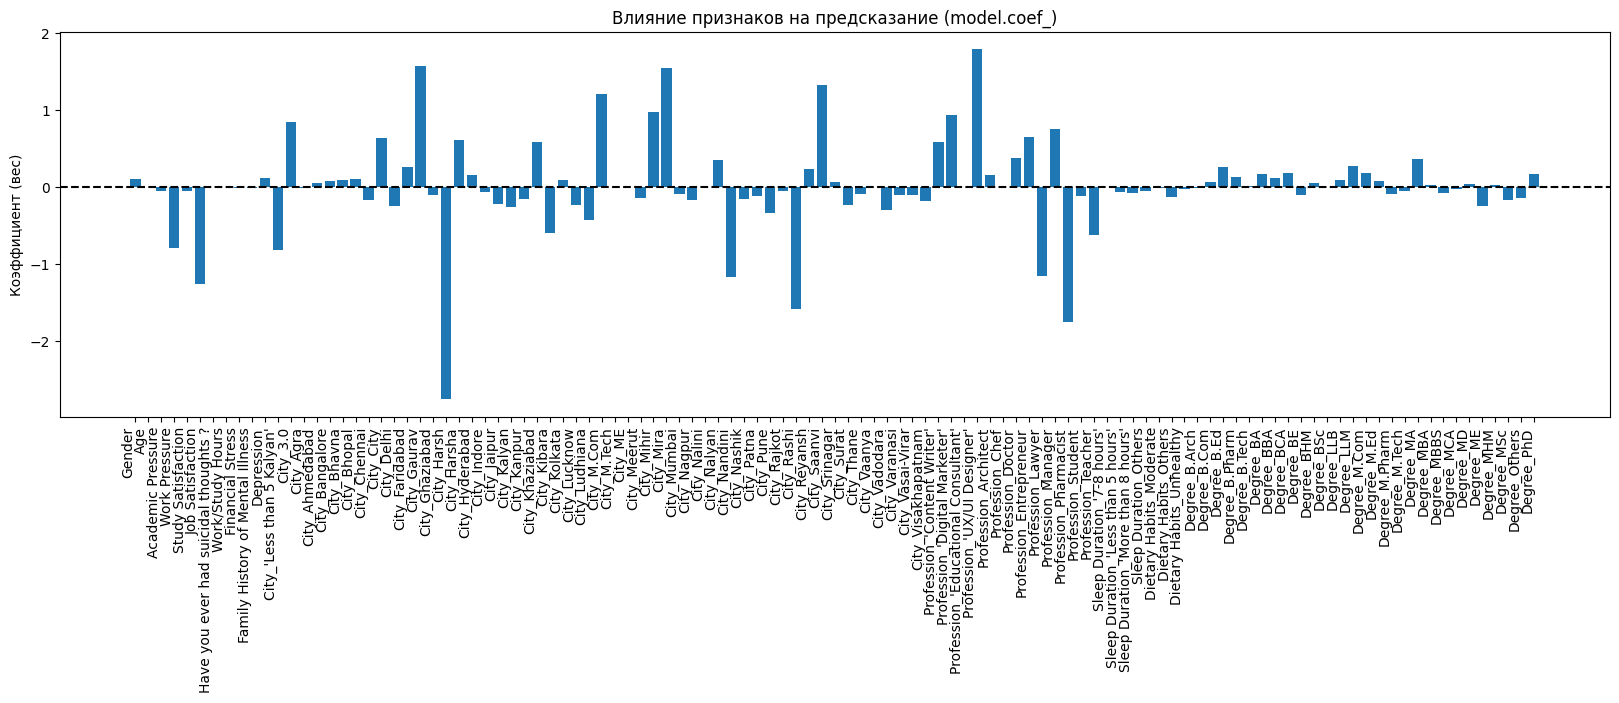

In [24]:
coefs = model21.coef_
coef_df = pd.DataFrame({"feature": X.columns, "coef": coefs})
plt.figure(figsize=(20,5))
plt.bar(coef_df["feature"], coef_df["coef"])
plt.axhline(y=0, color='black', linestyle='--')  # линия 0
plt.xticks(rotation=90, ha='right')
plt.ylabel("Коэффициент (вес)")
plt.title("Влияние признаков на предсказание (model.coef_)")
plt.show()

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Рездляем данные как 80% - обучение, 20% на тест
from sklearn.linear_model import LinearRegression

model22 = LinearRegression()
model22.fit(X_train, y_train)
y_pred_train = model22.predict(X_train)
print('X_train')
print(y_pred_train)
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error, root_mean_squared_error

MAE = mean_absolute_error(y_train, y_pred_train)
print('MAE %.3f' % MAE)

MAPE = mean_absolute_percentage_error(y_train, y_pred_train)
print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAPE, MAPE * 100, '%'))

R2 = r2_score(y_train, y_pred_train)
print('R2=%.3f' % R2)

MSE = mean_squared_error(y_train, y_pred_train)
print('MSE=%.3f' % MSE)

RMSE = root_mean_squared_error(y_train, y_pred_train)
print('RMSE=%.3f' % RMSE)

X_train
[7.62888596 7.53140149 7.74952698 ... 7.76853114 7.31789823 7.50494237]
MAE 1.251
MAPE=9407650262004.391, MAPE_as_percent=940765026200439.000%
R2=0.027
MSE=2.110
RMSE=1.453


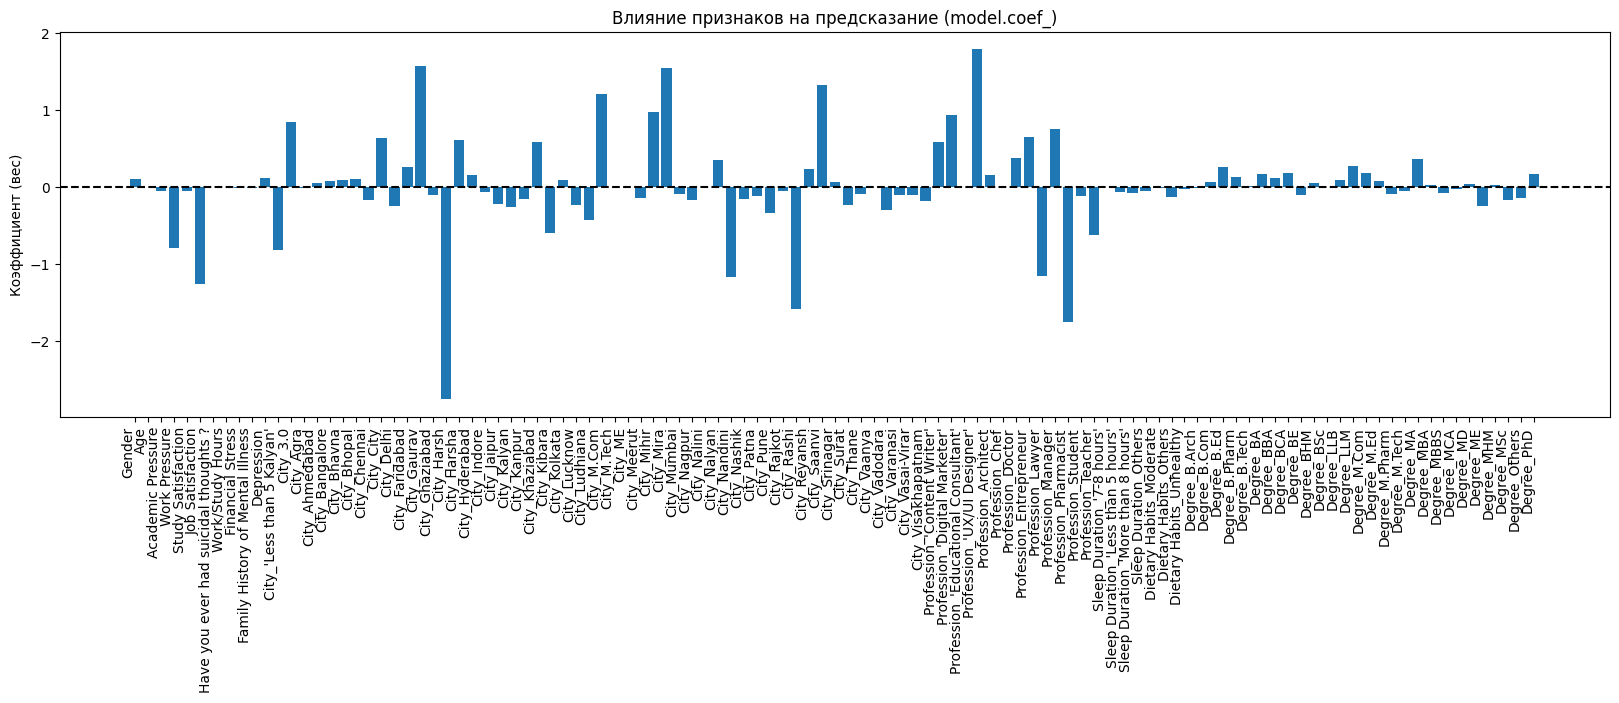

In [26]:
coefs = model22.coef_
coef_df = pd.DataFrame({"feature": X.columns, "coef": coefs})
plt.figure(figsize=(20,5))
plt.bar(coef_df["feature"], coef_df["coef"])
plt.axhline(y=0, color='black', linestyle='--')  # линия 0
plt.xticks(rotation=90, ha='right')
plt.ylabel("Коэффициент (вес)")
plt.title("Влияние признаков на предсказание (model.coef_)")
plt.show()

### Интерпретация модели 2:
X_train

[7.62888596 7.53140149 7.74952698 ... 7.76853114 7.31789823 7.50494237]

MAE 1.251

MAPE=9407650262004.391, MAPE_as_percent=940765026200439.000%

R2=0.027

MSE=2.110

RMSE=1.453

X_test

[7.31933646 7.69222575 7.41620152 ... 7.70239506 7.75562676 7.8892299 ]

MAE 1.254

MAPE=0.173, MAPE_as_percent=17.332%

R2=0.014

MSE=2.110

RMSE=1.453

Вывод:

MAE почти одно и тоже у двух 2 моделей и у 1 модели

MAPE у X_train невоззможно определит, а у X_test показал хороший результат

R2 ещё больше прилизилось к среднему (предсказание на тестовых данных проявило себя хуже)

MSE незначительно стало хуже

RMSE незначительно стало хуже

Графики примерно одинаковые (сильное влияние имеют отдельные города и профессии)





### Модель № 3

Использовать только best_features (отобранные признаки).

Обучить на всей выборке.

Предсказать на всей выборке.

Вывести метрики качества и интерпретировать.

Визуализировать коэффициенты и интерпретировать.

In [35]:
from sklearn.linear_model import LinearRegression
X_best = df
X_best= df.drop(["City", "CGPA","Profession","Degree"], axis=1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_best["Gender"] = le.fit_transform(df["Gender"]) #Male=1, Female=0
X_best["Have you ever had suicidal thoughts ?"] = le.fit_transform(df["Have you ever had suicidal thoughts ?"])
X_best["Family History of Mental Illness"] = le.fit_transform(df["Family History of Mental Illness"])
from sklearn.preprocessing import OneHotEncoder
cat_cols = ['Sleep Duration', 'Dietary Habits']
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded = encoder.fit_transform(X_best[cat_cols])
encoded_df = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(cat_cols),
    index=X_best.index
)
X_best = X_best.drop(columns=cat_cols)
X_best = pd.concat([X_best, encoded_df], axis=1)


model3 = LinearRegression()
model3.fit(X_best, y)
y_pred3 = model3.predict(X_best)
print(y_pred3)
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error, root_mean_squared_error

MAE = mean_absolute_error(y, y_pred3)
print('MAE %.3f' % MAE)

MAPE = mean_absolute_percentage_error(y, y_pred3)
print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAPE, MAPE * 100, '%'))

R2 = r2_score(y, y_pred3)
print('R2=%.3f' % R2)

MSE = mean_squared_error(y, y_pred3)
print('MSE=%.3f' % MSE)

RMSE = root_mean_squared_error(y, y_pred3)
print('RMSE=%.3f' % RMSE)

[7.82013848 7.55875966 7.57505732 ... 7.60628072 7.53138438 7.76338415]
MAE 1.267
MAPE=7662268233507.451, MAPE_as_percent=766226823350745.125%
R2=0.009
MSE=2.143
RMSE=1.464


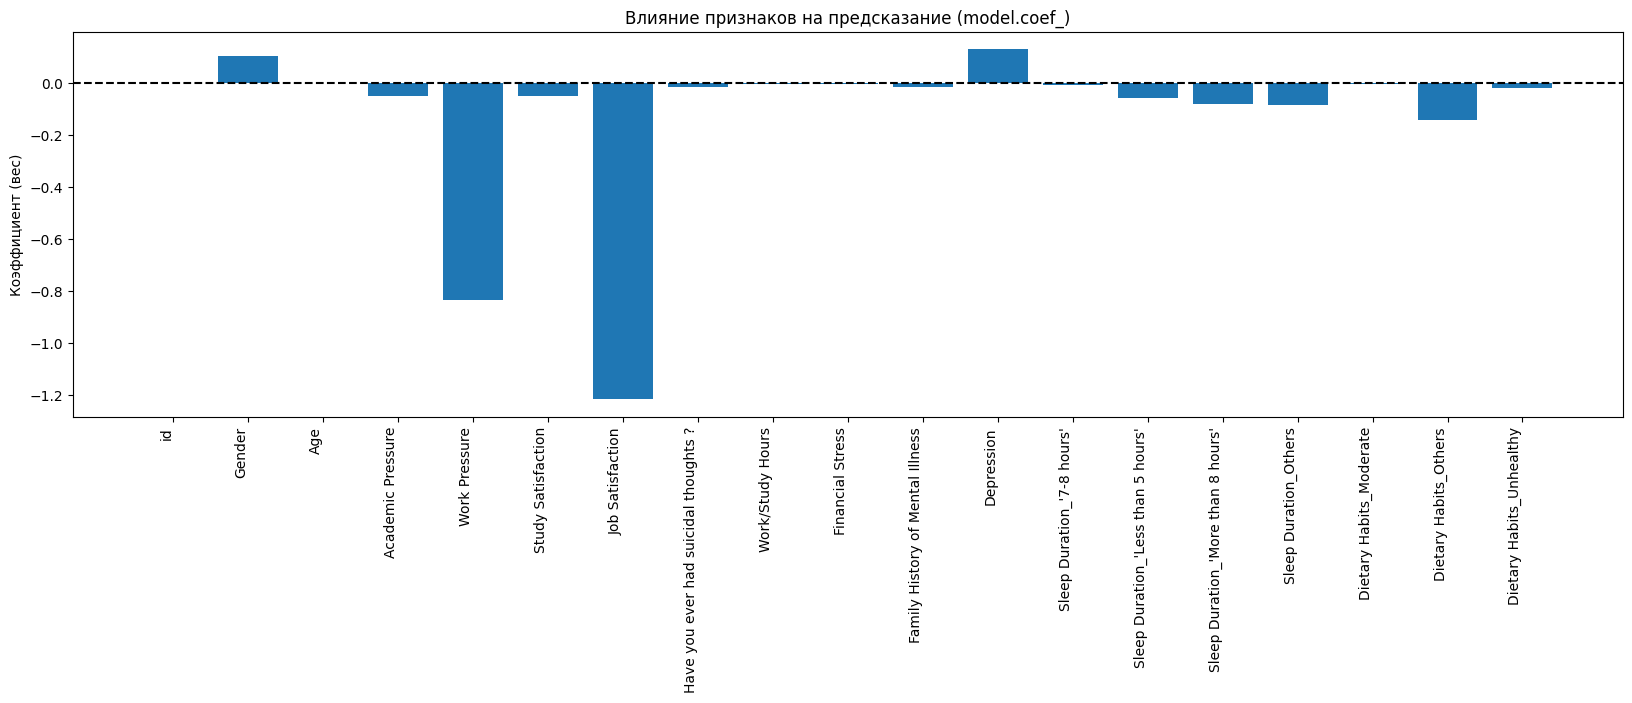

In [37]:
coefs = model3.coef_
coef_df = pd.DataFrame({"feature": X_best.columns, "coef": coefs})
plt.figure(figsize=(20,5))
plt.bar(coef_df["feature"], coef_df["coef"])
plt.axhline(y=0, color='black', linestyle='--')  # линия 0
plt.xticks(rotation=90, ha='right')
plt.ylabel("Коэффициент (вес)")
plt.title("Влияние признаков на предсказание (model.coef_)")
plt.show()

### Интерпретация модели 3:

MAE увеличилось

MAPE  невоззможно определить

R2 почти среднее

MSE незначительно стало хуже

RMSE незначительно стало хуже

По графику отрицательное влияние рабочего давления и оценки  из-за этих данных случились сильные выбросы

### Модель № 4

Использовать best_features.

Сделать train_test_split.

Обучить на X_train, предсказать на X_train и X_test.

Вывести метрики качества для обучающей и тестовой выборки, интерпретировать.

Визуализировать коэффициенты и интерпретировать.


In [40]:
from sklearn.linear_model import LinearRegression
X_best = df
X_best= df.drop(["City", "CGPA","Profession","Degree"], axis=1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_best["Gender"] = le.fit_transform(df["Gender"]) #Male=1, Female=0
X_best["Have you ever had suicidal thoughts ?"] = le.fit_transform(df["Have you ever had suicidal thoughts ?"])
X_best["Family History of Mental Illness"] = le.fit_transform(df["Family History of Mental Illness"])
from sklearn.preprocessing import OneHotEncoder
cat_cols = ['Sleep Duration', 'Dietary Habits']
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded = encoder.fit_transform(X_best[cat_cols])
encoded_df = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(cat_cols),
    index=X_best.index
)
X_best = X_best.drop(columns=cat_cols)
X_best = pd.concat([X_best, encoded_df], axis=1)

from sklearn.model_selection import train_test_split

X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(X_best, y, test_size=0.2, random_state=42) # Рездляем данные как 80% - обучение, 20% на тест
from sklearn.linear_model import LinearRegression

model41 = LinearRegression()
model41.fit(X_train_best, y_train_best)
y_pred_train = model41.predict(X_train_best)
print('X_train_best')
print(y_pred_train)

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error, root_mean_squared_error

MAE = mean_absolute_error(y_train_best, y_pred_train)
print('MAE %.3f' % MAE)

MAPE = mean_absolute_percentage_error(y_train_best, y_pred_train)
print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAPE, MAPE * 100, '%'))

R2 = r2_score(y_train_best, y_pred_train)
print('R2=%.3f' % R2)

MSE = mean_squared_error(y_train_best, y_pred_train)
print('MSE=%.3f' % MSE)

RMSE = root_mean_squared_error(y_train_best, y_pred_train)
print('RMSE=%.3f' % RMSE)

model42 = LinearRegression()
model42.fit(X_train_best, y_train_best)
y_pred_test = model42.predict(X_test_best)
print('X_test_best')
print(y_pred_test)

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error, root_mean_squared_error

MAE = mean_absolute_error(y_test_best, y_pred_test)
print('MAE %.3f' % MAE)

MAPE = mean_absolute_percentage_error(y_test_best, y_pred_test)
print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAPE, MAPE * 100, '%'))

R2 = r2_score(y_test_best, y_pred_test)
print('R2=%.3f' % R2)

MSE = mean_squared_error(y_test_best, y_pred_test)
print('MSE=%.3f' % MSE)

RMSE = root_mean_squared_error(y_test_best, y_pred_test)
print('RMSE=%.3f' % RMSE)





X_train_best
[7.65342578 7.39071079 7.56287207 ... 7.63070712 7.37840158 7.63478797]
MAE 1.268
MAPE=9553246467364.000, MAPE_as_percent=955324646736400.000%
R2=0.010
MSE=2.146
RMSE=1.465
X_test_best
[7.50526272 7.62891073 7.60213116 ... 7.5124176  7.74225518 7.72672008]
MAE 1.265
MAPE=0.175, MAPE_as_percent=17.503%
R2=0.003
MSE=2.133
RMSE=1.460


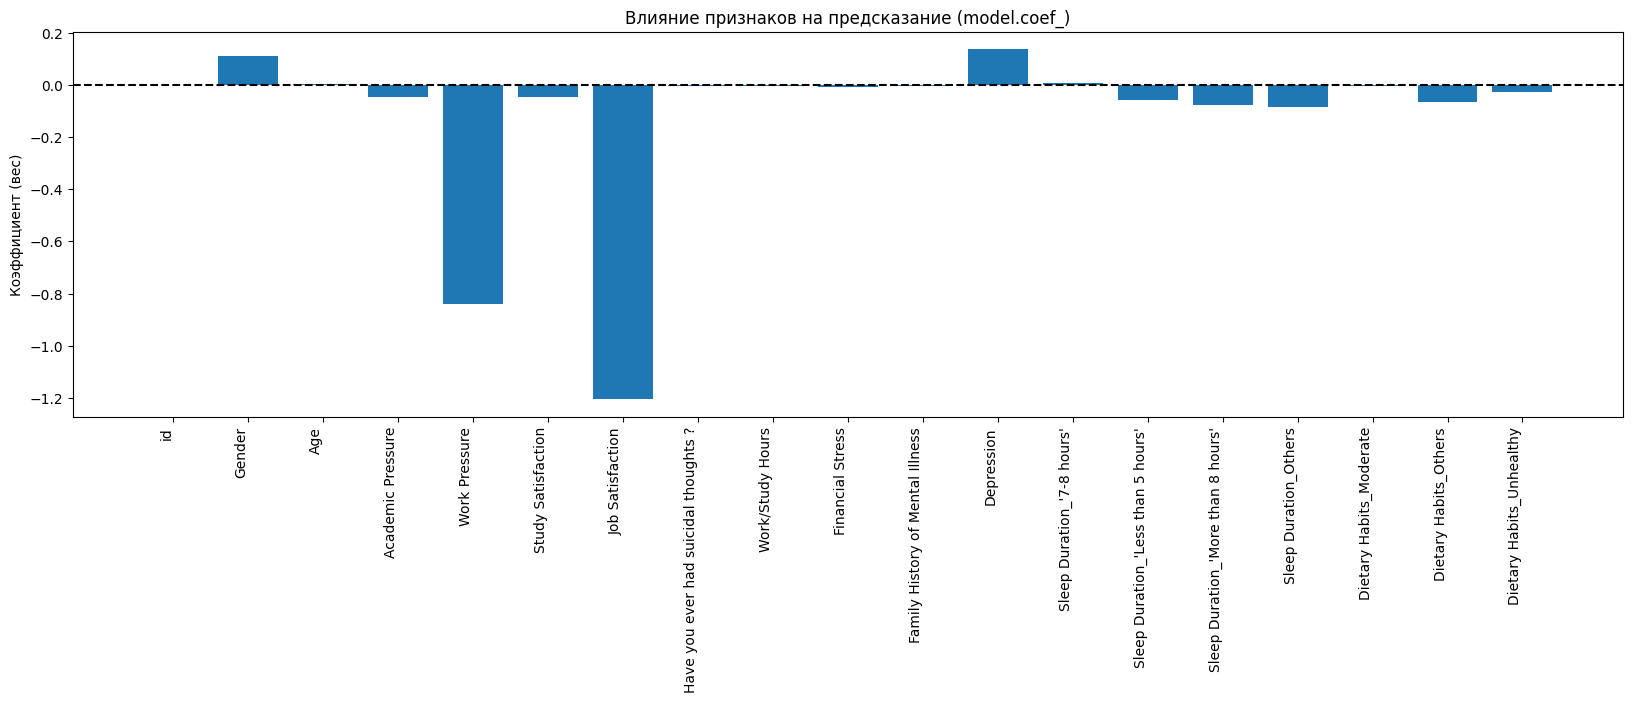

In [41]:
coefs = model41.coef_
coef_df = pd.DataFrame({"feature": X_best.columns, "coef": coefs})
plt.figure(figsize=(20,5))
plt.bar(coef_df["feature"], coef_df["coef"])
plt.axhline(y=0, color='black', linestyle='--')  # линия 0
plt.xticks(rotation=90, ha='right')
plt.ylabel("Коэффициент (вес)")
plt.title("Влияние признаков на предсказание (model.coef_)")
plt.show()

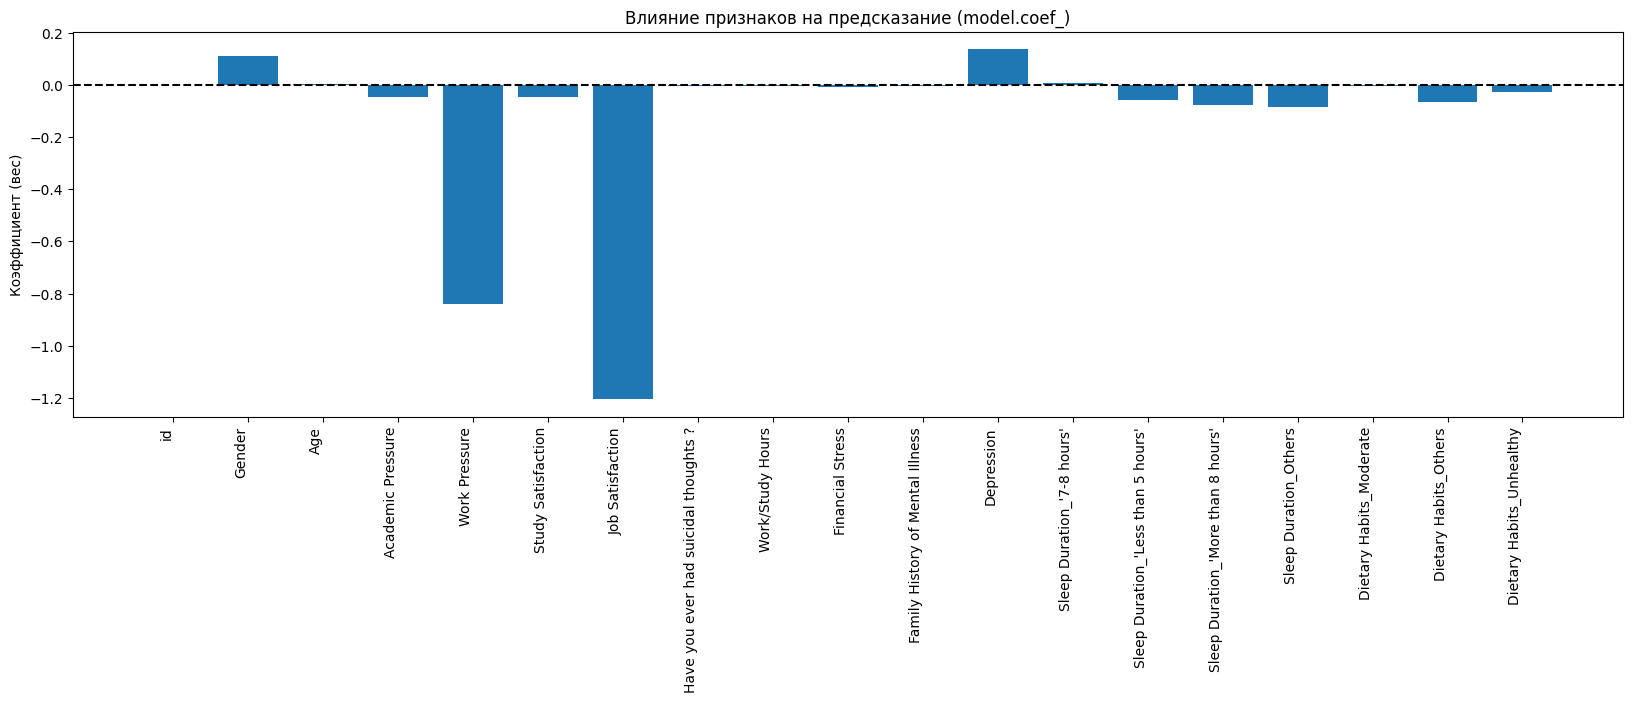

In [42]:
coefs = model42.coef_
coef_df = pd.DataFrame({"feature": X_best.columns, "coef": coefs})
plt.figure(figsize=(20,5))
plt.bar(coef_df["feature"], coef_df["coef"])
plt.axhline(y=0, color='black', linestyle='--')  # линия 0
plt.xticks(rotation=90, ha='right')
plt.ylabel("Коэффициент (вес)")
plt.title("Влияние признаков на предсказание (model.coef_)")
plt.show()

### Интерпретация модели 4:
Предсказания модели не улучшились все метрики примерно остались на том же уровне

С графиком такая же ситуация

## Вывод

Был проведён предварительный анализ данных и обучены четыре модели линейной регрессии для прогнозирования успеваемости. Однако результаты оценки показали неудовлетворительные значения метрик: ни одна из моделей не продемонстрировала приемлемого качества. Таким образом, на основе имеющихся данных предсказать успеваемость не представляется возможным.

